In [33]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import tensorly as tl
from tensorly.decomposition import parafac


# Load "Meta-Dataset"

In [34]:
work_dir = "/home/spaka002/NSF_REU_2024/"

In [35]:
tensor = np.array(torch.load(f"{work_dir}meta_datasets/GB_car_evaluation_709.pt"))

In [36]:
# t1 = torch.load(f"{work_dir}meta_datasets/FCNN_glass_717.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/FCNN_car_evaluation_717.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/FCNN_spambase_719.pt")

# tensor = np.array(torch.stack((t1, t2, t3)))

# del t1, t2, t3

In [37]:
# t1 = torch.load(f"{work_dir}meta_datasets/KNN_glass_710.pt")
# t2 = torch.load(f"{work_dir}meta_datasets/KNN_creditcard_fraud_710.pt")
# t3 = torch.load(f"{work_dir}meta_datasets/KNN_Spambase_710.pt")

# tensor = np.array(torch.stack((t1, t2, t3)))

# del t1, t2, t3

In [38]:
print(tensor.shape)
total_cells = 1
for i in tensor.shape: total_cells*=i

print(f"{total_cells} total cells.")

(8, 10, 8, 6)
3840 total cells.


In [39]:
# print(np.round(tensor, 3))

# Decomposition & Plot Reconstruction Error

In [40]:
errors = list()

for r in range(1, 200+1):                     # range of ranks to test
    
    errors+=[parafac(tensor=tensor, 
                     rank=r, 
                     n_iter_max=100, 
                     init='random', 
                     tol=1e-6, 
                     random_state=18, 
                     return_errors=True, 
                     sparsity=None)[1][-1]]

AttributeError: module 'tensorly' has no attribute 'conj'

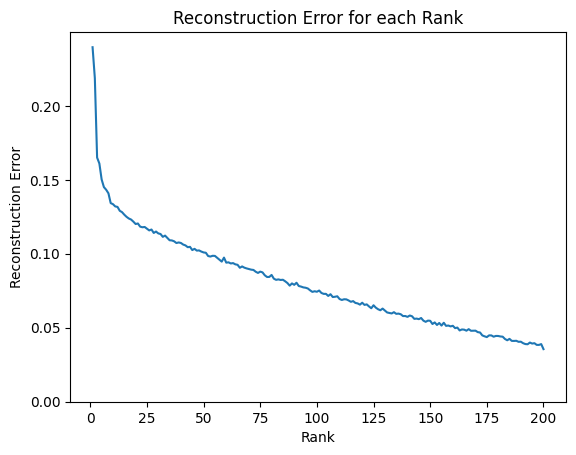

In [ ]:
r_values = np.arange(len(errors))+1

plt.plot(r_values, errors)

plt.title('Reconstruction Error for each Rank')
plt.xlabel('Rank')
plt.ylabel('Reconstruction Error')

plt.ylim(bottom=0)

plt.show()